## **Heart Disease Prediction using Logistic Regression**

Heart disease is a common disease specially for aged people. There are some certain factors which cause angiographic disease. There are two csv files in kaggle (training and test). As we all know, data prepocessing, cleaning, feature selection and aggregation is very crucial to design a perfect model. Thus, I will try to do data preprocessing step by step and then Logistic Model will be used to train the dataset. Afterthat, as test dataset does not have class label, I will fit the test into training dataset and put a label whether they have heart disease or not.

### **Importing Libraries**

In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sci
import matplotlib.pyplot as matplt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as matlab
%matplotlib inline

### **Loading Training Dataset**

In [105]:
heart_train = pd.read_csv("/home/samiulengineer/Desktop/sami/data/heart_train.csv")
heart_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


### **Changing Data Types**

Change all data types and convert all '?' values to Nan values

In [106]:
heart_train['Column4'] = pd.to_numeric(heart_train['Column4'], errors = 'coerce')
heart_train['Column5'] = pd.to_numeric(heart_train['Column5'], errors = 'coerce')
heart_train['Column6'] = pd.to_numeric(heart_train['Column6'], errors = 'coerce')
heart_train['Column7'] = pd.to_numeric(heart_train['Column7'], errors = 'coerce')
heart_train['Column8'] = pd.to_numeric(heart_train['Column8'], errors = 'coerce')
heart_train['Column9'] = pd.to_numeric(heart_train['Column9'], errors = 'coerce')
heart_train['Column10'] = pd.to_numeric(heart_train['Column10'], errors = 'coerce')
heart_train['Column11'] = pd.to_numeric(heart_train['Column11'], errors = 'coerce')
heart_train['Column12'] = pd.to_numeric(heart_train['Column12'], errors = 'coerce')
heart_train['Column13'] = pd.to_numeric(heart_train['Column13'], errors = 'coerce')

### **Changing Attributes Name**

In [107]:
heart_train.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 
                           'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 
                           'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels',
                           'Column13' : 'thal', 'Column14' : 'angiographic_disease'}, inplace = True)
heart_train.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal,angiographic_disease
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


## **Dropout Attributes**

There are many missing values specially in **peak_exc, maj_vessels, thal** attributes. These three attributes will not give any meaningful model

In [108]:
heart_train = heart_train.fillna(heart_train.mean())

### **Changing Class Attributes**

angiographic_disease has 5 types of values (0 = No, 1,2,3,4 = Yes)<br>
Change all 1,2,3,4 values to 1 (1 = yes)

In [109]:
heart_train['angiographic_disease'] = (heart_train['angiographic_disease'] >= 1).astype(int)

### **Changing Data Types to Integer**

In [110]:
heart_train = heart_train.astype(int)

### **Implementing Random Forrest and Fit the Model**

>***Training Set = 75%<br>
Test Set = 25%***

In [111]:
from sklearn.model_selection import train_test_split

x = heart_train.iloc[:,:-1]
y = heart_train.iloc[:,-1]

# train_test_split will return the 4 array
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

### **Fit Random Forest Model**

In [112]:
# random forest regressor is used to find out the mean value close to class label
# from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 15)

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### **Model Accuracy**

In [113]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve

# predict disease from x_test set
y_pred = rf.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)

print('Accuracy of Random Forest classifier on test set is: {}%'.format(round(accuracy,2)*100))

Accuracy of Random Forest classifier on test set is: 79.0%


In [114]:
# from sklearn.metrics import auc

# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# train_results = []
# test_results = []

# for estimator in n_estimators:
#    rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
#    rf.fit(x_train, y_train)
    
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
    
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = matplt.plot(n_estimators, train_results, 'b', label = "Train AUC")
# line2, = matplt.plot(n_estimators, test_results, 'r', label = "Test AUC")

# matplt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
# matplt.ylabel("AUC score")
# matplt.xlabel("n_estimators")
# matplt.grid()

# matplt.show()

In [115]:
# from sklearn.metrics import auc

# max_depths = np.linspace(1, 32, 32, endpoint = True)
# train_results = []
# test_results = []

# for max_depth in max_depths:
#    rf = RandomForestClassifier(max_depth = max_depth, n_jobs = -1)
#    rf.fit(x_train, y_train)
    
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
    
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = matplt.plot(max_depths, train_results, 'b', label = "Train AUC")
# line2, = matplt.plot(max_depths, test_results, 'r', label = "Test AUC")

# matplt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
# matplt.ylabel("AUC score")
# matplt.xlabel("max_depth")
# matplt.grid()

# matplt.show()

In [116]:
# from sklearn.metrics import auc

# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)
# train_results = []
# test_results = []

# for min_samples_split in min_samples_splits:
#    rf = RandomForestClassifier(min_samples_split = min_samples_split, n_jobs = -1)
#    rf.fit(x_train, y_train)
    
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
    
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = matplt.plot(min_samples_splits, train_results, 'b', label = "Train AUC")
# line2, = matplt.plot(min_samples_splits, test_results, 'r', label = "Test AUC")

# matplt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
# matplt.ylabel("AUC score")
# matplt.xlabel("min_samples_split")
# matplt.grid()

# matplt.show()

In [117]:
# from sklearn.metrics import auc

# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# train_results = []
# test_results = []

# for min_samples_leaf in min_samples_leafs:
#    rf = RandomForestClassifier(min_samples_leaf = min_samples_leaf, n_jobs = -1)
#    rf.fit(x_train, y_train)
    
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
    
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D

# line1, = matplt.plot(min_samples_leafs, train_results, 'b', label = "Train AUC")
# line2, = matplt.plot(min_samples_leafs, test_results, 'r', label = "Test AUC")

# matplt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
# matplt.ylabel("AUC score")
# matplt.xlabel("min_samples_leaf")
# matplt.grid()

# matplt.show()

### **Total Number of 1 (yes) and 0 (no) Predictions**

In [118]:
y_pred_count = np.unique(y_pred, return_counts = True)
y_pred_count

(array([0, 1]), array([ 79, 116]))

Here model predicted in the test dataset (splitted from training dataset) 76 instaces have no angiographic disease, whereas 82 instances have it. 

### **Confusion Matrix**

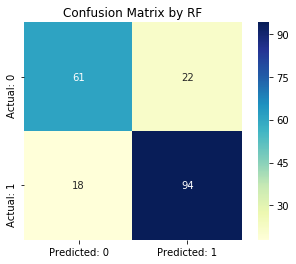

In [119]:
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cfmx, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

fig = sb.heatmap(data = conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu", square = True)
fig.set_title('Confusion Matrix by RF')

fig.get_figure().savefig('/home/samiulengineer/Desktop/sami/result_image/conf_matrix_rf.png')

### **Correct & Incorrect Prediction**

In [120]:
TN = cfmx[0,0]
TP = cfmx[1,1]
FN = cfmx[1,0]
FP = cfmx[0,1]

print("The confusion matrix shows %i correct predictions and %i incorrect predictions" % ((TN + TP), (FN + FP)))

The confusion matrix shows 155 correct predictions and 40 incorrect predictions


### ***Specificity***

In [124]:
specificity = TN/(TN+FP)
specificity

0.7349397590361446

### **Classification Report**

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        83
           1       0.81      0.84      0.82       112

   micro avg       0.79      0.79      0.79       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.79      0.79      0.79       195



f1-score for 0 and 1 both cases are almost 0.80 which is impressive and a good indication of good model

### **ROC Curve Coverage Area**

In [122]:
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,rf.predict_proba(x_test)[:,1])

if roc_auc_score >= 0.70:
    print("ROC Curve Covers almost %i%% Area" % (round(roc_auc_score, 2)*100))
else:
     print("ROC Curve Covers almost %i%% Area Which is not Satisfactory" % (round(roc_auc_score, 2)*100))  

ROC Curve Covers almost 86% Area


### **ROC Curve**

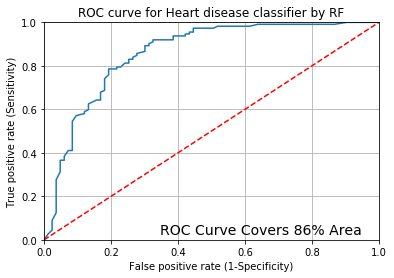

In [123]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

matplt.plot(fpr,tpr)
matplt.xlim([0.0, 1.0])
matplt.ylim([0.0, 1.0])
matplt.plot([0, 1], [0, 1], 'r--')
matplt.title('ROC curve for Heart disease classifier by RF')
matplt.xlabel('False positive rate (1-Specificity)')
matplt.ylabel('True positive rate (Sensitivity)')
matplt.grid(True)
matplt.text(0.95, 0.01, "ROC Curve Covers %i%% Area" % (round(roc_auc_score, 2)*100), verticalalignment='bottom', horizontalalignment = 'right', fontsize = 14)

matplt.savefig('/home/samiulengineer/Desktop/sami/result_image/roc_curve_rf.png')

Red dot line is the essential factor. ROC curve must be to the upper left corner and make a good distance with red dotted line to make a perfect model.
In this case ROC curve is in almost perfect condition.

### ***MCC***

In [125]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.5783463135352